In [206]:
%matplotlib inline
import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

### Reading the data

In [207]:
df = pd.read_csv('Output.csv')
df.head()

,Arrival Date/Time,Dispo Date/Time,Depart Date/Time,Disposition,ESI Score,72 Hr Return Time
0,2/22/2019 0:02,NaN,2/23/2019 16:35,Unknown,2,NaN
1,2/22/2019 0:35,2/22/2019 3:35,2/22/2019 3:35,LWOT,3,NaN
2,2/22/2019 0:44,2/22/2019 3:44,2/22/2019 3:44,LWOT,3,NaN
3,2/22/2019 0:47,2/22/2019 3:47,2/22/2019 3:47,LWOT,3,NaN
4,2/22/2019 0:53,2/22/2019 3:53,2/22/2019 3:53,LWOT,3,NaN


In [208]:
df.shape

(56835, 6)

In [209]:
df.columns

Index(['Arrival Date/Time', 'Dispo Date/Time', 'Depart Date/Time',
       'Disposition', 'ESI Score', '72 Hr Return Time'],
      dtype='object')

### Dropping the 72 hr return time, Dispo Date/Time	and Depart Date/Time column

In [210]:
df.drop(columns=["72 Hr Return Time","Dispo Date/Time","Depart Date/Time"],axis=1,inplace=True)

### Checking for Null Values

In [211]:
df.isnull().sum()

Arrival Date/Time    0
Disposition          0
ESI Score            0
dtype: int64

### Mutilabels in Disposition Column

In [212]:
df.Disposition.unique() 

array(['Unknown', 'LWOT', 'Transferred', 'Admitted', 'Discharge',
       'Expired'], dtype=object)

### Changing the data type of Arrival Date/Time 

In [213]:
df.dtypes

Arrival Date/Time    object
Disposition          object
ESI Score             int64
dtype: object

In [214]:
df['Arrival Date/Time'] = pd.to_datetime(df['Arrival Date/Time'])

In [215]:
df.dtypes

Arrival Date/Time    datetime64[ns]
Disposition                  object
ESI Score                     int64
dtype: object

### Ways to change the data for predicting the LWOT-
#### Convert the dates into days of a week.
#### Add time slots in a day.
#### Duration of stay(Maybe)

In [216]:
df.head()

,Arrival Date/Time,Disposition,ESI Score
0,2019-02-22 00:02:00,Unknown,2
1,2019-02-22 00:35:00,LWOT,3
2,2019-02-22 00:44:00,LWOT,3
3,2019-02-22 00:47:00,LWOT,3
4,2019-02-22 00:53:00,LWOT,3


### Finding the day in a week from the dates 

In [217]:
df['Arrival Date/Time'] = pd.to_datetime(df['Arrival Date/Time'], format="%Y-%m-%d %H:%M:%S")
df.dtypes

Arrival Date/Time    datetime64[ns]
Disposition                  object
ESI Score                     int64
dtype: object

In [218]:
df.head()

,Arrival Date/Time,Disposition,ESI Score
0,2019-02-22 00:02:00,Unknown,2
1,2019-02-22 00:35:00,LWOT,3
2,2019-02-22 00:44:00,LWOT,3
3,2019-02-22 00:47:00,LWOT,3
4,2019-02-22 00:53:00,LWOT,3


In [219]:
df['day_of_week'] = df['Arrival Date/Time'].dt.day_name()

In [221]:
df=df[["Arrival Date/Time","day_of_week","ESI Score","Disposition"]]
df.drop(columns=["Arrival Date/Time"],axis=1,inplace=True)
df.head()

,day_of_week,ESI Score,Disposition
0,Friday,2,Unknown
1,Friday,3,LWOT
2,Friday,3,LWOT
3,Friday,3,LWOT
4,Friday,3,LWOT


### encoding the multilabel values in Disposition

### Encoding day of week and ESI Score

In [232]:
# # creating one hot encoder object with categorical feature 0 
# # indicating the first column 
# columnTransformer = ColumnTransformer([('encoder', 
#                                         OneHotEncoder(), 
#                                         [1])], 
#                                       remainder='passthrough') 
  
# data = np.array(columnTransformer.fit_transform(df), dtype = np.str)
# data.head()

In [222]:
onehotencoder = OneHotEncoder()
data = np.array(columnTransformer.fit_transform(df), dtype = np.str) 
data

array([['0.0', '1.0', '0.0', ..., '0.0', 'Friday', 'Unknown'],
       ['0.0', '0.0', '1.0', ..., '0.0', 'Friday', 'LWOT'],
       ['0.0', '0.0', '1.0', ..., '0.0', 'Friday', 'LWOT'],
       ...,
       ['0.0', '0.0', '1.0', ..., '0.0', 'Tuesday', 'Discharge'],
       ['0.0', '0.0', '1.0', ..., '0.0', 'Tuesday', 'Discharge'],
       ['1.0', '0.0', '0.0', ..., '0.0', 'Tuesday', 'Admitted']],
      dtype='<U11')

In [ ]:
# data=pd.df({'ESI Score':['1','2','3','4','5']})
# encoder=ce.OneHotEncoder(cols='ESI Score',handle_unknown='return_nan',return_df=True,use_cat_names=True)

## Visualization


In [231]:
# df.plot.scatter(x = 'day_of_week', y = 'Disposition',
#                   color = 'sandybrown', title = 'LWOT')

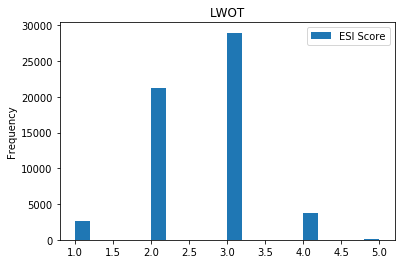

In [230]:
df[['ESI Score']].plot.hist(bins = 20, title = 'LWOT')
